# Modelling Hovercraft Motion With Differential Equations

Joseph Godoy | Computational Physics | Project 01 | 2018
________


**Theory**

If you've taken physics in high school, you're probably familiar with motion due to a constant force applied to the center of mass. Using Newton's second law, $F = m \ddot x$, we can easily split the force into $x$- and $y$- components, and use the kinematic equations to model the object's motion.

However, things start to get interesting when the force is applied some radius $r$ away from the center of mass. In this case, the system's behavior over time is described with a system of six differential equations of motion that have no analytic solution.

$\dfrac{d\omega}{dt} = \dfrac{rF}{I}$ $ \hspace{8mm} \dfrac{d\theta}{dt} = \omega$ $ \hspace{8mm}\dfrac{dV_x}{dt} = \dfrac{F_x}{m}$ $\hspace{8mm} \dfrac{dx}{dt} = v_x$ $\hspace{8mm} \dfrac{dV_y}{dt} = \dfrac{F_y}{m}$ $\hspace{8mm}\dfrac{dy}{dt} = v_y$

This notebook takes the system and time-evolves it in three iterative steps: the creation of an initial state vector, the calculation of derivatives, and the numerical integration over those derivatives via the fourth-order Runge-Kutta method.

$ \begin{bmatrix}x \\ y \\ \dot{x}\\ \dot{y}\\ \theta\\ \omega\end{bmatrix} \longrightarrow  \begin{bmatrix}\dot{x} \\ \dot{y} \\ \ddot{x}\\ \ddot{y}\\ \omega\\ \dot{\omega}\end{bmatrix} \longrightarrow \begin{bmatrix}\int_{t}^{t+h}\dot{x}dt \\ \int_{t}^{t+h}\dot{y}dt \\ \int_{t}^{t+h}\ddot{x}dt \\ \int_{t}^{t+h}\ddot{y}dt\\ \int_{t}^{t+h}\omega dt \\\int_{t}^{t+h}\dot{\omega}dt \end{bmatrix} \longrightarrow  \begin{bmatrix}x \\ y \\ \dot{x}\\ \dot{y}\\ \theta\\ \omega\end{bmatrix} \longrightarrow \hspace{2mm}...$

___

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
import ode
import seaborn
seaborn.set()
%matplotlib inline

def motion(state_vector, t):
    F_x = -1.0 * F * np.sin(state_vector[4])
    F_y = F * np.cos(state_vector[4])
    
    derivative_vector = np.zeros(6)          # x, y, vx, vy, theta, omega
    derivative_vector[0] = state_vector[2] 
    derivative_vector[1] = state_vector[3]
    derivative_vector[2] = F_x / m
    derivative_vector[3] = F_y / m
    derivative_vector[4] = state_vector[5]
    derivative_vector[5] = r * F / I
    return derivative_vector

def run_simulation(parameter_dict):
    
    global r
    global F
    global m
    global I
    global F_x
    global F_y
    
    xi, yi       = parameter_dict['xi'], parameter_dict['yi']
    vxi, vyi     = parameter_dict['vxi'], parameter_dict['vyi']
    theta, omega = parameter_dict['thetai'], parameter_dict['omegai']
    time, simulation_time, time_step = parameter_dict['ti'], parameter_dict['tf'], parameter_dict['dt']
    r, F, m, I   = parameter_dict['r'], parameter_dict['F'], parameter_dict['m'], parameter_dict['I']
    state_vector = np.asarray([xi, yi, vxi, vyi, theta, omega])

    F_x = -1.0 * F * np.sin(state_vector[4])
    F_y = F * np.cos(state_vector[4])

    x_array, y_array, vx_array, vy_array, theta_array, omega_array, time_array = [], [], [], [], [], [], []

    while time < simulation_time:
        time_array.append(time)
        x_array.append(state_vector[0]) 
        y_array.append(state_vector[1]) 
        vx_array.append(state_vector[2])
        vy_array.append(state_vector[3])
        theta_array.append(state_vector[4])
        omega_array.append(state_vector[5])
        new_state_vector = ode.RK4(motion, state_vector, time, time_step) 
        for i in range(len(new_state_vector)): 
            state_vector[i] = new_state_vector[i] 

        F_x = -1.0 * F * np.sin(state_vector[4])
        F_y = F * np.cos(state_vector[4])

        time += time_step 
    
    return x_array, y_array, vx_array, vy_array, theta_array, omega_array, time_array


def plot_simulation(x,y,vx,vy,theta,omega,t):
    
    plt.figure(figsize=(5,5))
    plt.title("Trajectory")
    plt.plot(x, y, 'b-', label = ' Trajectory ')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    
    
    plt.figure(figsize=(14,5))
    plt.title("$x$, $y$ ($m$)")
    plt.plot(t, x, 'b-', label = ' X-pos ')
    plt.plot(t, y, 'green', label = ' Y-pos ')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')

    plt.figure(figsize=(14,5))
    plt.title("$v_x$, $v_y$ ($m/s$)")
    plt.plot(t, vx, 'b-', label = ' X-velocity ')
    plt.plot(t, vy, 'green', label = ' Y-velocity ')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')

    plt.figure(figsize=(14,5))
    plt.title("$\\theta(t)$")
    plt.plot(t, theta, 'b-', label = '| $\\theta$ |')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('$\\theta$ (rads)')

    plt.figure(figsize=(14,5))
    plt.title("$\omega(t)$")
    plt.plot(t, omega, 'c--', label = '| $\omega$ |')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('$\omega(t)$ (rads / s)')


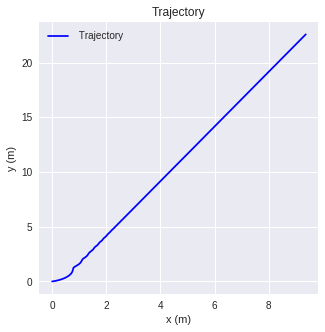

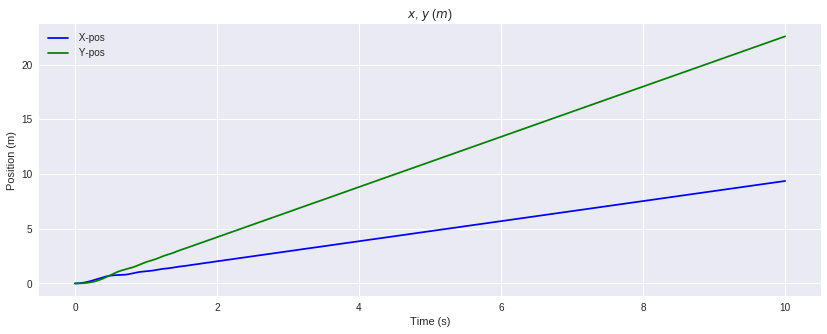

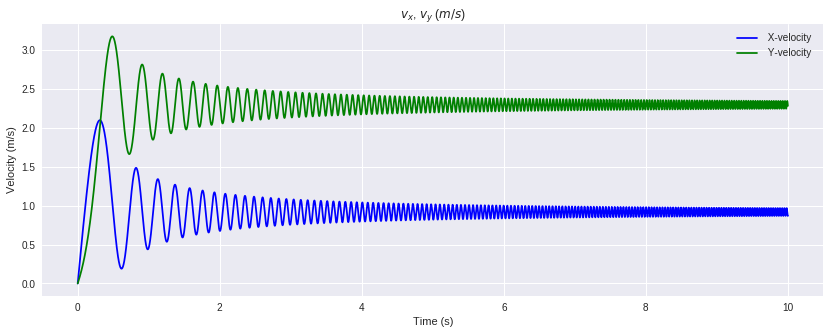

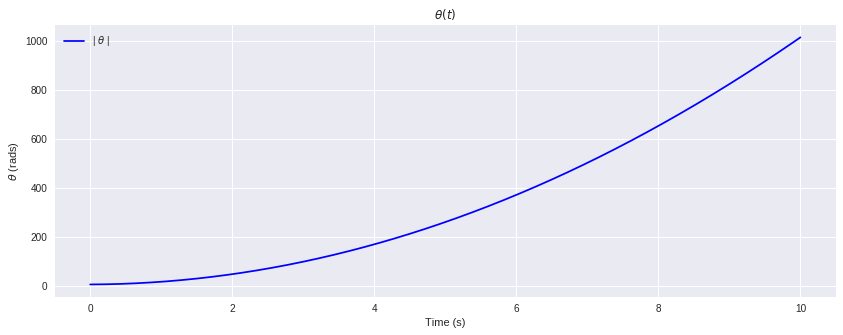

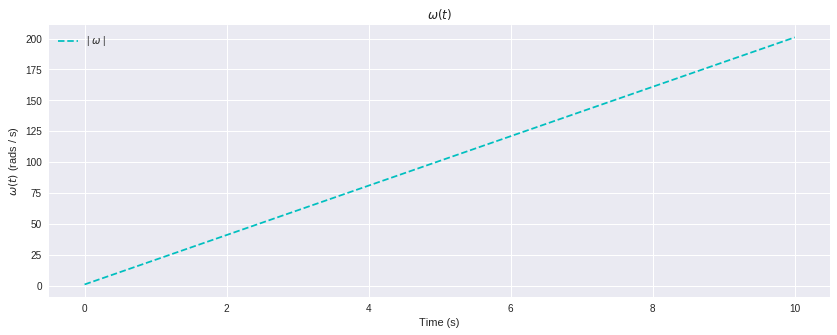

In [42]:
parameters_1 = {
    'xi': 0.0,
    'yi': 0.0,
    'vxi': 0.0,
    'vyi': 0.0,
    'thetai': 5,
    'omegai': 1,
    'ti': 0.0,
    'tf':10,
    'dt':0.001,
    'r': 1,
    'F': 1000,
    'm': 100,
    'I': 50,
}

plot_simulation(*run_simulation(parameters_1))

______________________

**Case 1**

In this simulation, our hovercraft makes its way over to the upper-right of the plane. This makes sense; our $v_x$ and $v_y$ values are, while oscillating sinusoidially, positive. $\theta$ is increasing quadratically, and $\omega$ is increasing linearly, implying a constant rate of angular acceleration. The model (at least) appears to be self-consistent. Let's try running the same simulation, but with a force of 10 Newtons instead of 1,000. We will also use a slightly longer simulation time (15 instead of 10 seconds) to capture important features of the graphs.

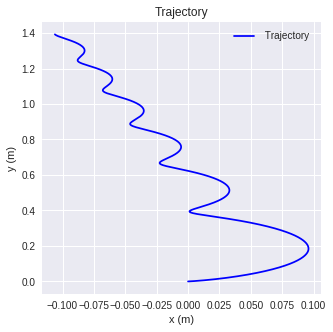

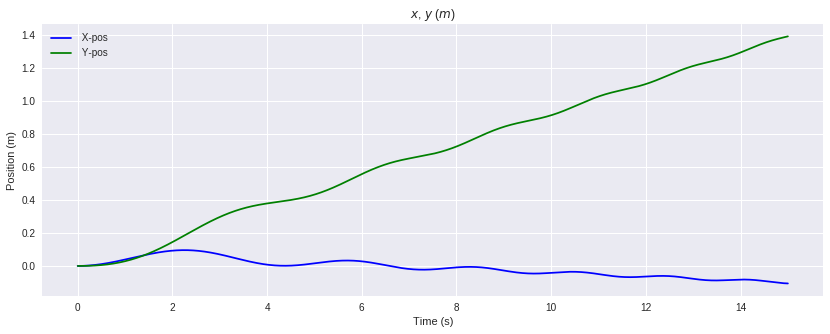

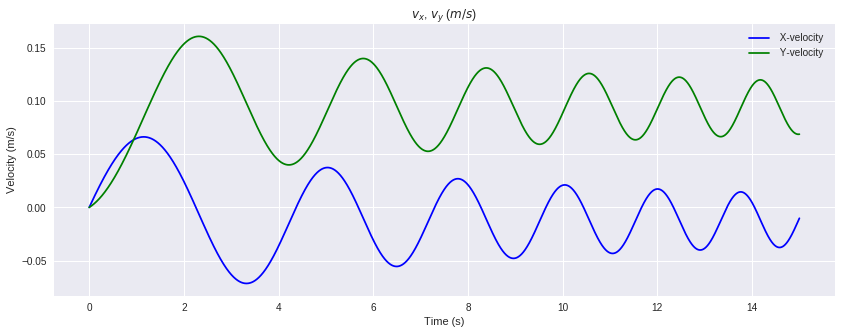

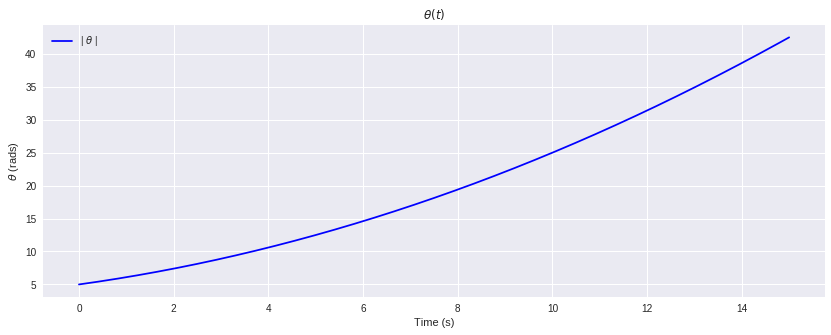

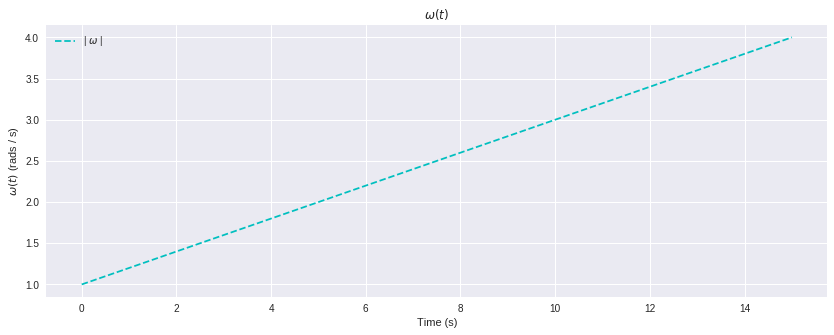

In [43]:
parameters_2 = {
    'xi': 0.0,
    'yi': 0.0,
    'vxi': 0.0,
    'vyi': 0.0,
    'thetai': 5,
    'omegai': 1,
    'ti': 0.0,
    'tf':15,
    'dt':0.001,
    'r': 1,
    'F': 10,
    'm': 100,
    'I': 50,
}

plot_simulation(*run_simulation(parameters_2))

**Case 2**

The trajectory is quite different, but the system behaves similarly. 

Upon close inspection, one will notice that the new $x$, $y,$ $v_x$, and $v_y$ plots are stretched-out versions of the previous ones. Also, as you might have expected the $\theta$ graph shows fewer radians being covered per unit time, i.e. the hovercraft rotates slower when a smaller force is applied (a similar trend can be found in the $\omega$ graph.) Let's try this again, but with the force applied much closer to the center of mass, and with a $\theta_i$ of zero. This should place the force vector on-axis (in this program, it appears that theta is defined as coming down from the Y-axis, making a ray with theta = 0 pointing along the Y-axis), and the system should behave similarly to one-dimentional point-mass motion.

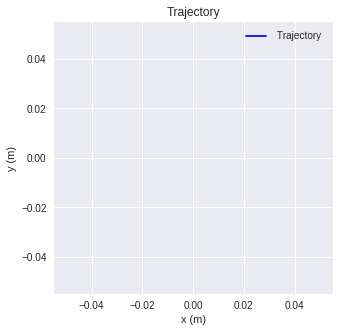

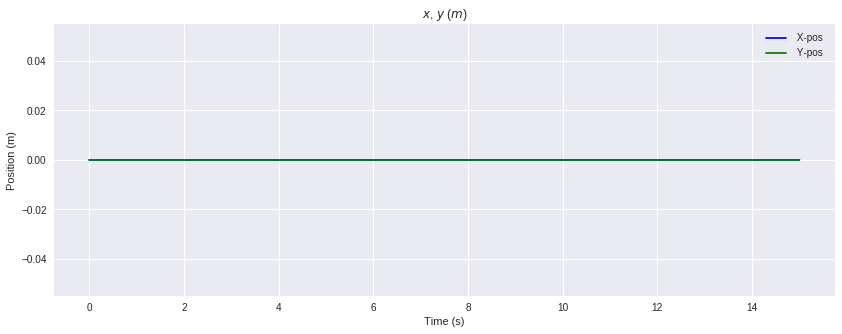

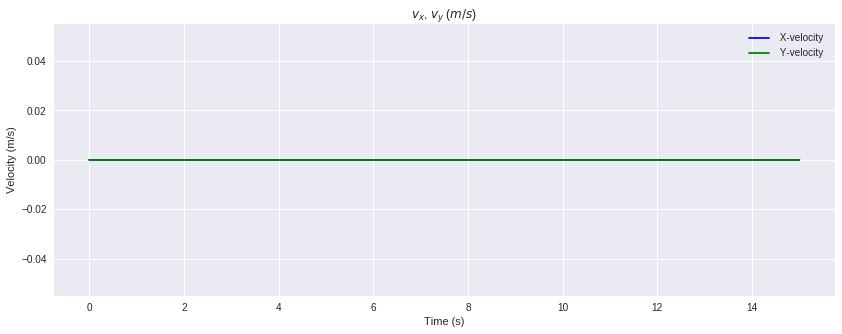

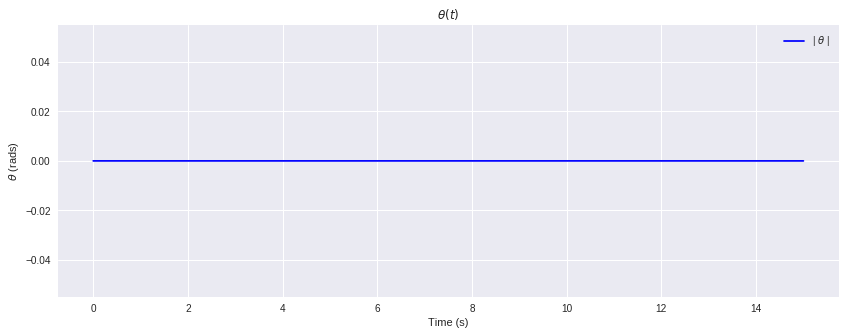

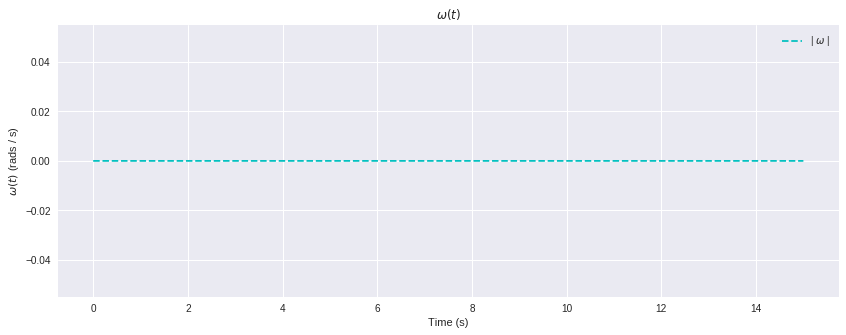

In [44]:
parameters_3 = {
    'xi': 0.0,
    'yi': 0.0,
    'vxi': 0.0,
    'vyi': 0.0,
    'thetai': 0,
    'omegai': 0,
    'ti': 0.0,
    'tf':15,
    'dt':0.001,
    'r': 1,
    'F': 0,
    'm': 100,
    'I': 50,
}

plot_simulation(*run_simulation(parameters_3))

**Case 3**

This one's a check for self-consistency. With no initial velocity and no force applied to the system, it stays right where it is and does not rotate.

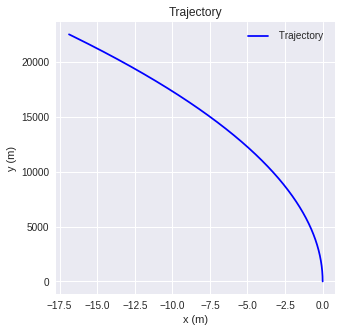

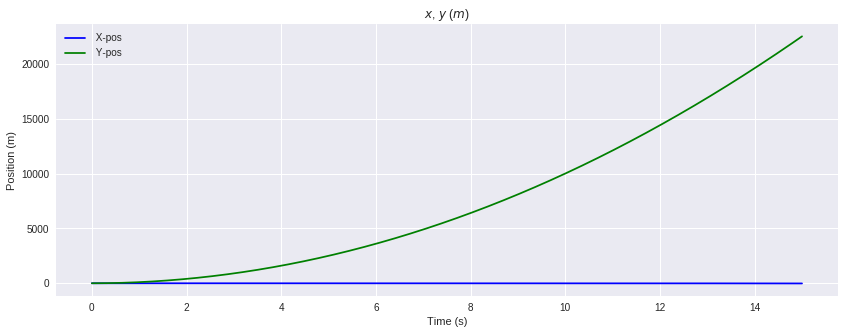

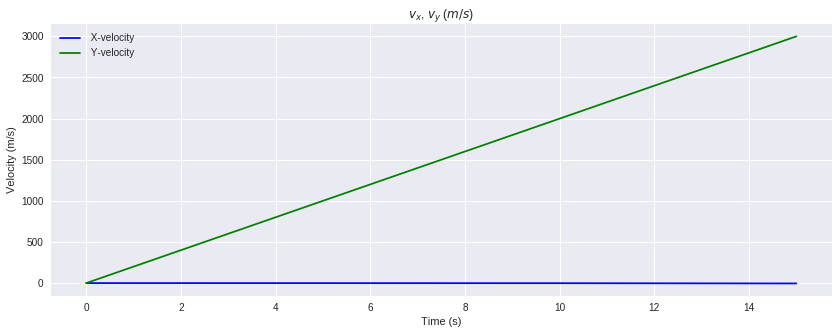

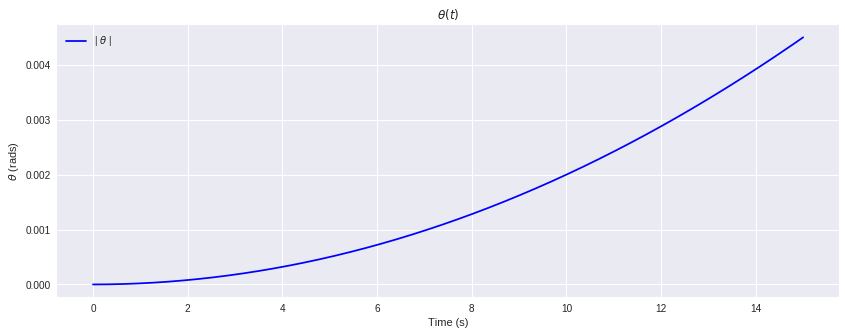

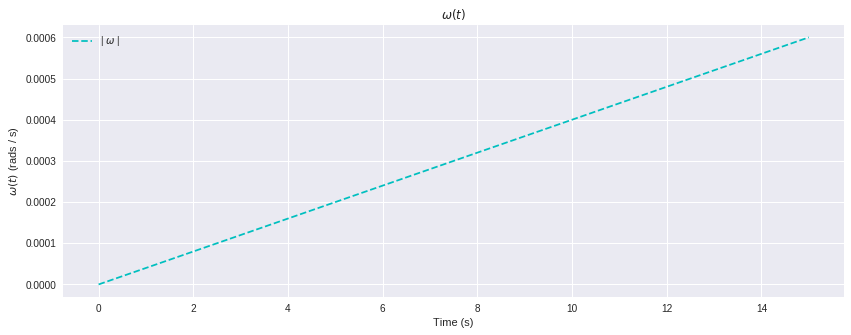

In [45]:
parameters_4 = {
    'xi': 0.0,
    'yi': 0.0,
    'vxi': 0.0,
    'vyi': 0.0,
    'thetai': 0.0,
    'omegai': 0.0,
    'ti': 0.0,
    'tf':15,
    'dt':0.001,
    'r': 0.00001,
    'F': 200,
    'm': 1,
    'I': 50,
}

plot_simulation(*run_simulation(parameters_4))

**Case 4**

The changes in $\theta$ and $\omega$ are extremely small, as the net torque is extremely small when the force is applied close to the center of mass. The X-position and X-velocitiy changes very little, and the y-components' behavior resembles one-dimensional kinematics.